# Leading digit of a product of two random numbers

The first time I heard about the leading digit "anomaly", was in college. Our physics teacher told us the story of an astronomer who noticed, that the first pages of logarithm tables were much dirtier than the last pages. The teacher explained it by saying that if we perform multiplications of several random numbers we will obtain a distribution in which the probability of the leading digit 1 will be 0.3, and decrease with each following digit. The only lesson I learned was that a good hygiene can be detrimental to the discovery of math.   

Later in university I made the same observation while playing with a random number generator. I observed that the leading digit of a product of two random numbers followed some distribution. Eventually it was a colleague who pointed me the Benford's law, which states that leading digit $d$ occures with probability:

$$P(d) = \log_{10}(1+\frac{1}{d})$$

I also discovered that a leading digit of a product of two random numbers doesn't follow the Benford's law exactly.

I'm not saying that Benford's law is wrong. The simulation will approach the Benford's law if at each step we multiply several, not just two random numbers. With 4 random numbers, the leading digit distribution will be very close to Benford's law.

I'm saysing that the probability $Q$ of a leading digit for a product of two random numbers from a uniform distribution is given by:

$$
Q(d) = \frac{1}{9}\Big[1 - (d+1)\ln(d+1) + d\ln(d) + \frac{10}{9}\ln(10)\Big]
$$

It's not as concise as Benford's law and it only works for a uniform distribution with the upper boundary of $10^k$. But it's precise.

In [15]:
%matplotlib inline
import random
import math

import matplotlib
import numpy
import matplotlib.pyplot as pyplot
from IPython.core.display import HTML
import pandas

In [92]:
ln = math.log
digits = [1,2,3,4,5,6,7,8,9]

sample_size = 100000
digit_count = {d: 0 for d in digits}
for i in range(sample_size):
    #product = random.randint(1,10**5) * random.randint(1, 10**5)
    product = random.random() * random.random()
    digit = int(('%e' % (product))[0])
    digit_count[digit] += 1

prob = []
for d in digits:
    benford_prob = math.log(1 + 1./d, 10)
    product_prob = float(digit_count[d])/sample_size
    prob_RxR = 1./9 * (1 - (d+1) * ln(d+1) + d*ln(d) + 10./9 * ln(10)) 
    prob.append((d, product_prob, benford_prob, prob_RxR))
    
df = pandas.DataFrame(prob, columns=['Leading Digit', 'Frequency', 'Benford', 'Q'])
HTML(df.to_html(index=False, float_format='{0:.3f}'.format))


Leading Digit,Frequency,Benford,Q
1,0.241,0.301,0.241
2,0.182,0.176,0.183
3,0.148,0.125,0.145
4,0.116,0.097,0.117
5,0.096,0.079,0.095
6,0.076,0.067,0.076
7,0.061,0.058,0.060
8,0.046,0.051,0.047
9,0.034,0.046,0.034


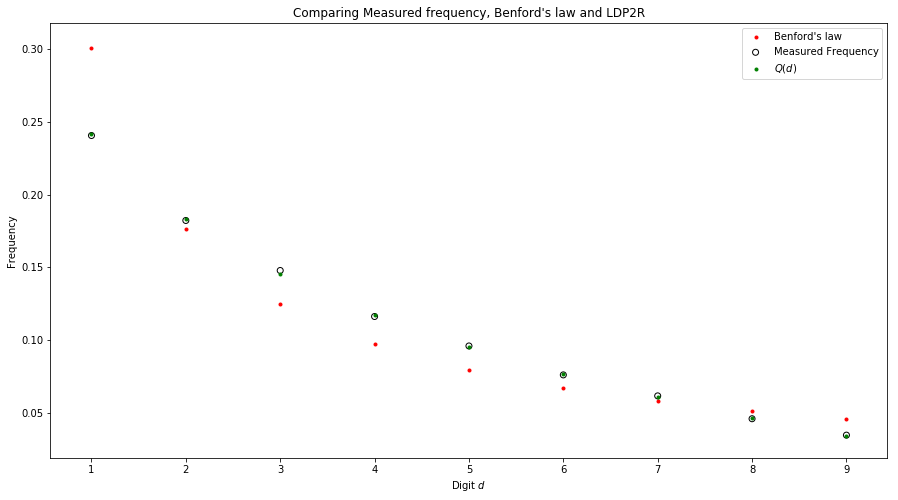

In [95]:
pyplot.figure(figsize=(15, 8))
pyplot.title('Comparing Measured frequency, Benford\'s law and LDP2R')
pyplot.scatter(df["Leading Digit"], df["Benford"], label="Benford's law", color='red', marker='.')
pyplot.scatter(df["Leading Digit"], df["Frequency"], label="Measured Frequency", facecolors='none', edgecolors='black')
pyplot.scatter(df["Leading Digit"], df["Q"], color='green', label="$Q(d)$", marker='.')

pyplot.legend()
pyplot.xlabel('Digit $d$')
pyplot.ylabel('Frequency')
pyplot.show()

To derive that formula I started by represinting the first digits of a product visually.

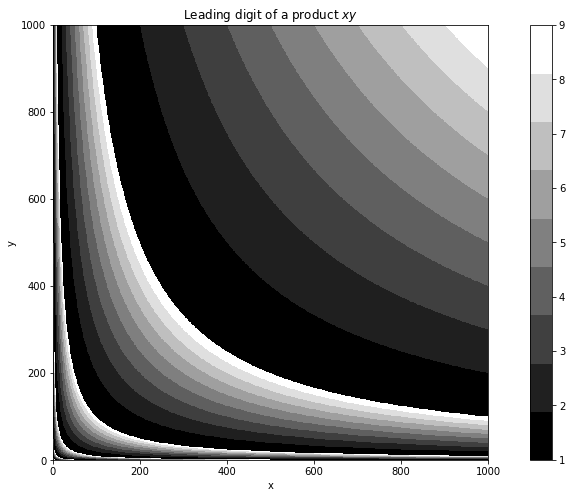

In [63]:
size = 1000
first_digit_prod = numpy.vectorize(lambda i,j: int(str((size-i-1) * (j+1))[0]))
digits = numpy.fromfunction(first_digit_prod, shape=(size-1, size-1))
pyplot.figure(figsize=(15, 8))
pyplot.imshow(digits,
              cmap=matplotlib.cm.get_cmap('gray', 9),
              extent=[1, size, 1, size],
              interpolation='none')
pyplot.colorbar()
pyplot.title('Leading digit of a product $xy$')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

This graph represents each prodct $xy$ with a different shade of gray based on the leading digit of that product. If we randomly point into that 1000x1000 sqare, the probability of getting a number starting with 1 "black" is higher than 9 "white". We can deduce this simply by observing that there's much more black area representing 1, than white area representing 9.

To get the leading digit probabilities, we can calculate the area representing a digit, relative to the total area. If we normalize the total area to 1, we can get the probabilities straight from the area.

Now we write the functions that delimit the digit areas in a normalized, 1x1 space.

$$l(x,d,n) = \frac{d}{10^nx}$$

Here, $n$ represents the scale of a pattern. It starts at 1 and goes to inifinity if x is in the real domain.



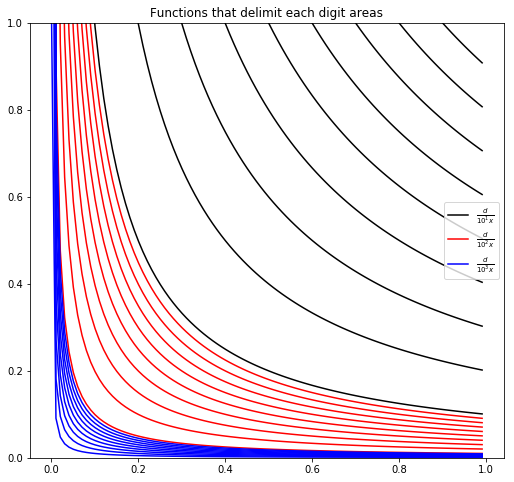

In [30]:
x = numpy.arange(0.001, 1, 0.01)
pyplot.figure(figsize=(20, 8))
digits = [1,2,3,4,5,6,7,8,9]
pyplot.title('Functions that delimit each digit areas')
n_color = [(1, 'black'), (2, 'red'), (3, 'blue')]

for n, color in n_color:
    for d in digits:
        y = [d/(10**n*i) for i in x]
        label = None
        if d == 1:
            label = "$\\frac{d}{10^{%d} x}$" % n
        pyplot.plot(x, y, color=color, label=label)
        
pyplot.legend(loc='right')
axes = pyplot.gca()
axes.set_ylim([0, 1])
axes.set_aspect('equal', adjustable='box')
pyplot.show()

Let's define $A_d^n$ as beeing the area between $l(x,d,n)$ and $l(x,d+1,n)$ in a unit square. The probability for a leading digit $d$ can be written as a sum of all areas representing that digit.

$$ Q(d) = \sum_{n=1}^{\infty} A_d^n $$

Here's the areas for the 3 first terms of that sum for every leading digit.

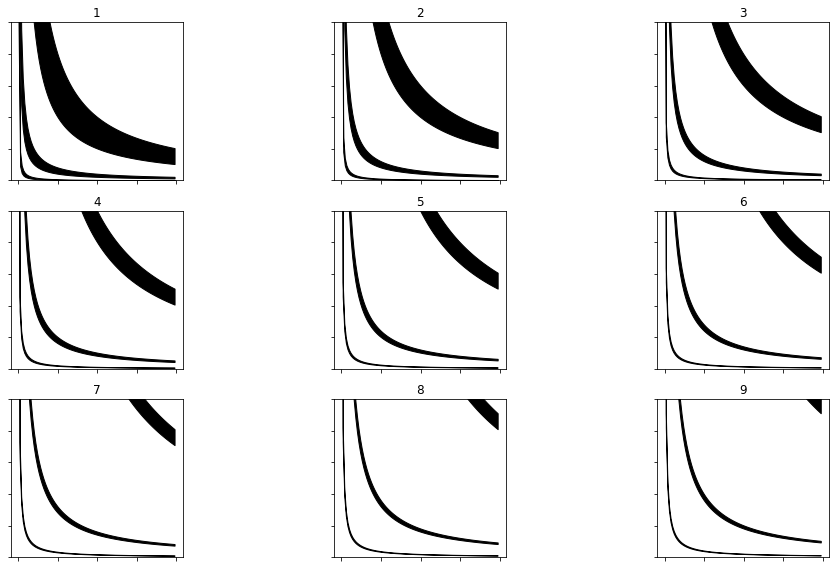

In [91]:
x = numpy.arange(0.001, 1, 0.01)
digits = range(1, 10)
pyplot.figure(figsize=(15, 8))
for d in digits:
    pyplot.subplot(3, 3, d, aspect='equal', ylim=[0, 1])
    for n in [1,2,3]:
        pyplot.title(str(d))
        y_1 = [float(d)/(10**n*i) for i in x]
        y_2 = [float(d+1)/(10**n*i) for i in x]
        pyplot.fill_between(x, y_1, y_2, color='black')
        pyplot.axes
        axes = pyplot.gca()
        axes.xaxis.set_ticklabels([])
        axes.yaxis.set_ticklabels([])
fig = pyplot.gcf()
pyplot.tight_layout()
pyplot.show()



The area between the functions $l(x,d,n)$ and $l(x,d+1,n)$ can be calculated by integrals.

$$A_d^n = \int_{\frac{d}{10^n}} ^{\frac{d+1}{10^n}} 1 dx + \int_{\frac{d+1}{10^n}}^{1} \frac{d+1}{10^n x} dx - \int_{\frac{d}{10^n}}^{1} \frac{d}{10^n x} dx $$

Using the property $\int_{a}^{b}\frac{1}{x}dx = \ln(b) - \ln(a)$ and some basic calculus we get:

$$A_d^n = \frac{1}{10^n}\Big[1 - (d+1)\ln(d+1) + d\ln(d) + n\ln(10)\Big] $$

Now we calculate the sum of all $A_d^n$ from $1$ to $\infty$.

$$ Q(d) = \sum_{n=1}^\infty \frac{1}{10^n}\Big[1 - (d+1)\ln(d+1) + d\ln(d) + n\ln(10)\Big] $$


$$
Q(d) = \frac{1}{9}\Big[1 - (d+1)\ln(d+1) + d\ln(d) + \frac{10}{9}\ln(10)\Big]
$$

And we're done. It's probably not very useful but it was fun.

I think it's possible, with the same approach, to obtain a formula for the leading digit probability of a product of 3 radom numbers $P_{R\times{R}\times{R}}(d)$. This can be acheived by calculating the volume in a 3D unit cube instead of area in a 2D unit sqaure. But I'm not up to that task because triple integrals hurt my head. I also think that if generalized to a N dimentional unit volume, this approach will yield the Benford's law. Easier said than done.